<a href="https://colab.research.google.com/github/WilliamHallPortfolio/Stratascratch_Projects/blob/main/Easy_01_Sales_Data_Analysis/Sales%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions and data can be found at:

https://platform.stratascratch.com/data-projects/sales-data-analysis

# Sales Data Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
!git clone https://github.com/WilliamHallPortfolio/Stratascratch_Projects.git

Cloning into 'Stratascratch_Projects'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 79 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 837.49 KiB | 2.11 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [3]:
folder = "/content/Stratascratch_Projects/Easy_01_Sales_Data_Analysis/datasets"

In [4]:
# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]

In [5]:
# Create an empty list to store each DataFrame
df_list = []

# Loop through the CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(folder, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Now you can view or save the combined DataFrame
df = combined_df
df

,sale_time,purchaser_gender
0,2012-12-31 00:50:18,female
1,2012-12-31 01:03:22,male
2,2012-12-31 01:47:11,female
3,2012-12-31 01:48:27,female
4,2012-12-31 02:18:06,male
...,...,...
204324,2013-04-21 22:59:11,male
204325,2013-04-21 23:03:40,female
204326,2013-04-21 23:20:43,female
204327,2013-04-21 23:40:26,female


In [6]:
# Convert 'sale_time' to datetime and set as index
df['sale_time'] = pd.to_datetime(df['sale_time'])
df.set_index('sale_time', inplace=True)

In [8]:
df_resampled = df.groupby(['purchaser_gender']).resample('D').size().reset_index(name='count')
df_resampled

,purchaser_gender,sale_time,count
0,female,2012-10-01,413
1,female,2012-10-02,379
2,female,2012-10-03,386
3,female,2012-10-04,432
4,female,2012-10-05,368
...,...,...,...
695,male,2013-09-11,495
696,male,2013-09-12,510
697,male,2013-09-13,537
698,male,2013-09-14,462


1. Plot daily sales for all 50 weeks. all 50 weeks? all 50 weeks?

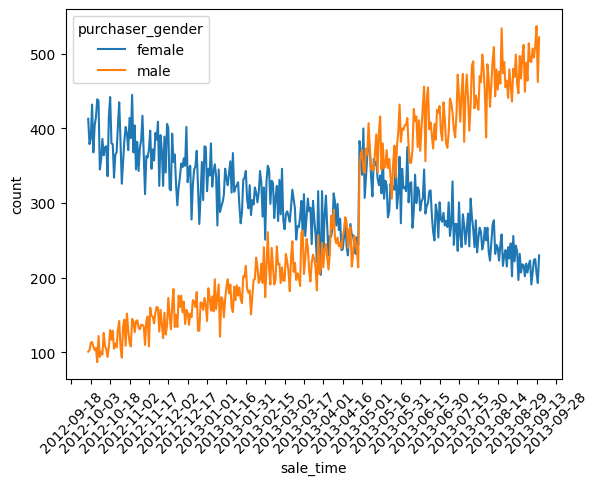

In [15]:
sns.lineplot(data=df_resampled, x='sale_time',y='count',hue='purchaser_gender')
# Creating weekly intervals
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.xticks(rotation=45)
plt.show()

2. It looks like there has been a sudden change in daily sales. What date did it occur?